In [1]:
import json
import tempfile

import numpy as np

In [2]:
import pitchcontext
from pitchcontext import Song, PitchContext
from pitchcontext.visualize import novelty2colordict, consonance2colordict, plotArray
from pitchcontext.models import computeConsonance, computeNovelty

/Users/krane108/git/polifonia-project/tunes-code/scripts/pitchcontext/song.py 12:32:55
/Users/krane108/git/polifonia-project/tunes-code/scripts/pitchcontext/pitchcontext.py 12:32:55
/Users/krane108/git/polifonia-project/tunes-code/scripts/pitchcontext/visualize.py 12:32:55
/Users/krane108/git/polifonia-project/tunes-code/scripts/pitchcontext/models.py 12:32:55


In [3]:
path_to_krn = 'NLB147059_01.krn'
with open('NLB147059_01.json','r') as f:
    mtcsong = json.load(f)

song = Song(mtcsong, path_to_krn)

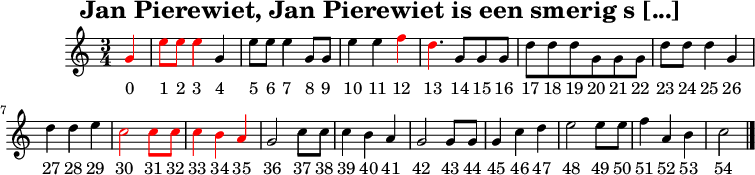

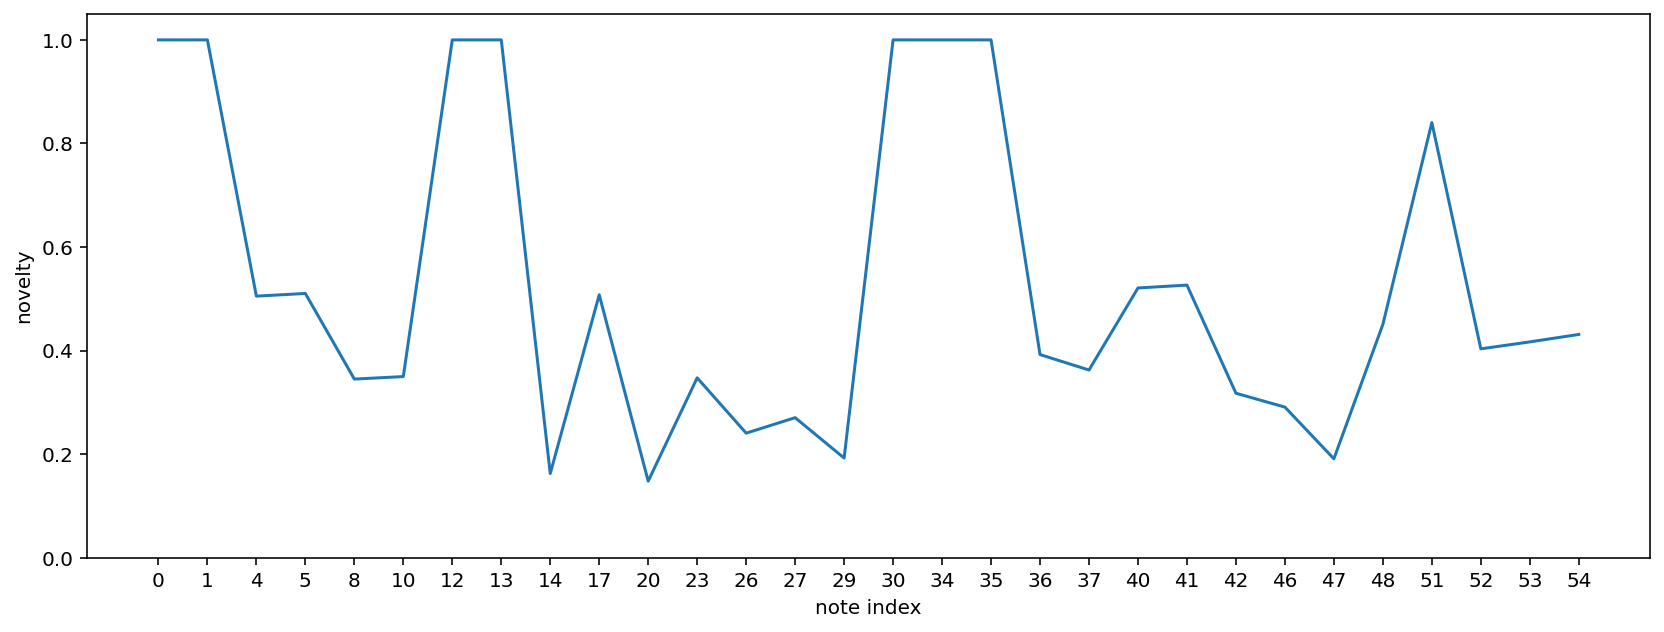

In [6]:
wpc = PitchContext(
    song,
    len_context_beat=(50.0,0.0),
    use_metric_weights=True,
    includeFocus='post',
    use_distance_weights=(True, False),
)
novelty = computeNovelty(song, wpc)
plotArray(novelty, wpc.ixs, 'note index', 'novelty');
cdict = novelty2colordict(novelty, wpc.ixs, 80, song.getSongLength())
with tempfile.TemporaryDirectory() as tmpdirname:
    song.showColoredPNG(cdict, tmpdirname, 'NLB147059_01_novelty', showfilename=False)

/Users/krane108/git/polifonia-project/tunes-code/scripts/pitchcontext/models.py:88: RuntimeWarning: invalid value encountered in true_divide
  context[:40] = context[:40] / np.sum(context[:40])
/Users/krane108/git/polifonia-project/tunes-code/scripts/pitchcontext/models.py:89: RuntimeWarning: invalid value encountered in true_divide
  context[40:] = context[40:] / np.sum(context[40:])


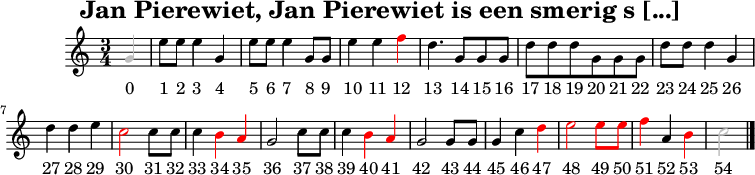

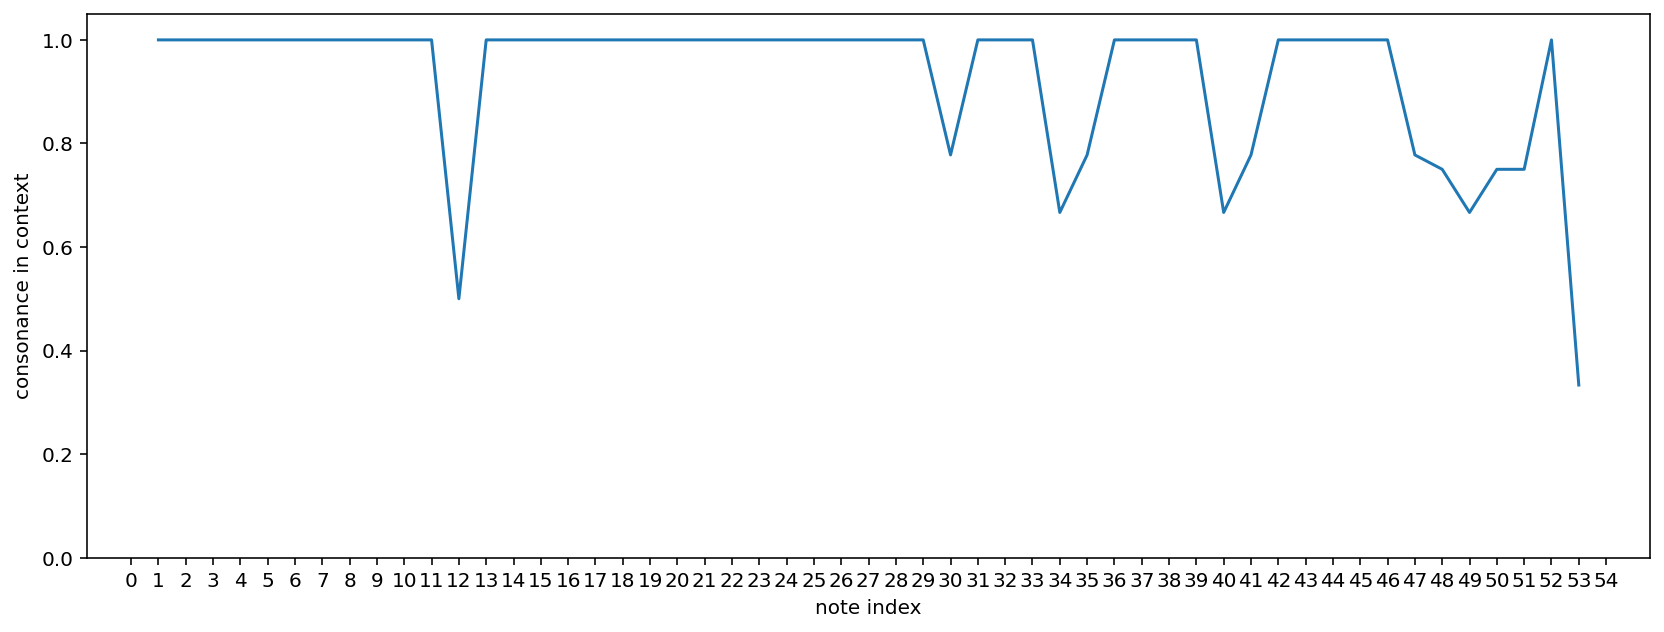

In [5]:
wpc = PitchContext(
    song,
    removeRepeats=False,
    len_context_beat=3.0,
    use_metric_weights=True,
    includeFocus='none',
    use_distance_weights=False,
)
consonance_pre, consonance_post, consonance_context  = computeConsonance(song, wpc)
plotArray(consonance_context, wpc.ixs, 'note index', 'consonance in context');
cdict = consonance2colordict(consonance_context, wpc.ixs, 20, song.getSongLength())
with tempfile.TemporaryDirectory() as tmpdirname:
    song.showColoredPNG(cdict, tmpdirname, 'NLB147059_01_consonance', showfilename=False)